In [144]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.svm import OneClassSVM
from sklearn.pipeline import Pipeline
import os
import glob
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [145]:
os.chdir("D:/Data")
csv_data_path = 'D:/Data/'

In [146]:
#Create a dataframe and the csv file

files = ['02-14-2018.csv',
        '02-15-2018.csv',
        '02-16-2018.csv',
        '02-20-2018.csv',
        '02-21-2018.csv',
        '02-22-2018.csv',
        '02-23-2018.csv',
        '02-28-2018.csv',
        '03-01-2018.csv',
        '03-02-2018.csv']


In [147]:
def fusionfiles(files):
    dfs = []
    for i in range (10):
        df = pd.read_csv(files[i],nrows=10000)
        dfs.append(df)
    return dfs

In [148]:
dfs = []
dfs = fusionfiles(files)

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [149]:
# Concatenation de toute les données dans un seul DataFrame
data_df = pd.concat(dfs)
data_df = data_df.drop([ 'Flow ID', 'Src IP', 'Dst IP', 'Src Port','Timestamp'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 9999
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Dst Port           100000 non-null  object
 1   Protocol           100000 non-null  object
 2   Flow Duration      100000 non-null  object
 3   Tot Fwd Pkts       100000 non-null  object
 4   Tot Bwd Pkts       100000 non-null  object
 5   TotLen Fwd Pkts    100000 non-null  object
 6   TotLen Bwd Pkts    100000 non-null  object
 7   Fwd Pkt Len Max    100000 non-null  object
 8   Fwd Pkt Len Min    100000 non-null  object
 9   Fwd Pkt Len Mean   100000 non-null  object
 10  Fwd Pkt Len Std    100000 non-null  object
 11  Bwd Pkt Len Max    100000 non-null  object
 12  Bwd Pkt Len Min    100000 non-null  object
 13  Bwd Pkt Len Mean   100000 non-null  object
 14  Bwd Pkt Len Std    100000 non-null  object
 15  Flow Byts/s        99648 non-null   object
 16  Flow Pkts/s        100

In [150]:
data_df['Label'].value_counts()

Benign                      43083
DDoS attacks-LOIC-HTTP       9934
DoS attacks-GoldenEye        9931
FTP-BruteForce               9904
DoS attacks-SlowHTTPTest     9899
Bot                          8520
DDOS attack-HOIC             6070
DDOS attack-LOIC-UDP         1730
Brute Force -Web              611
Brute Force -XSS              230
SQL Injection                  87
Label                           1
Name: Label, dtype: int64

In [151]:
le = preprocessing.LabelEncoder()
data_df['Label'] = le.fit_transform(data_df['Label'].values)
data_df['Label'].value_counts()

0     43083
6      9934
7      9931
9      9904
8      9899
1      8520
4      6070
5      1730
2       611
3       230
11       87
10        1
Name: Label, dtype: int64

In [152]:
# We still have 2 features that are still "text" with the word "Infinity"
data_df = data_df.replace('Infinity', 'inf')
for column in data_df.columns:
    data_df[column] = pd.to_numeric(data_df[column], errors='coerce')
data_df['Flow Pkts/s'] = pd.to_numeric(data_df['Flow Pkts/s'], errors='coerce')
data_df.dtypes
data_df['Label'].value_counts()


0     43083
6      9934
7      9931
9      9904
8      9899
1      8520
4      6070
5      1730
2       611
3       230
11       87
10        1
Name: Label, dtype: int64

In [153]:
#mettre des 0 dans les champs 
data_df.dropna()
data_df.fillna(data_df.mean(), inplace=True)


In [154]:
#création du fichier avec les variables qu'il faut et leur format 
data_df.to_csv (r'dt_2018_dataframe.csv', index = False, header=True)

In [156]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data_df, test_size = .20, random_state=0)

In [129]:
print("Train Size = {} | Test Size = {} | Test is {}% of Train".format(len(train_df),len(test_df), len(test_df)/len(data_df)))

Train Size = 80000 | Test Size = 20000 | Test is 0.2% of Train


In [130]:

train_df.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,8.000000e+04,8.000000e+04,80000.000000,80000.00000,80000.000000,...,80000.000000,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,80000.000000
mean,3358.676788,7.127200,1.670534e+07,2035.579475,5.346600,6.558754e+04,3.493138e+03,167.830437,17.19515,52.717173,...,23.585150,3.744303e+05,1.313144e+05,5.022335e+05,2.824287e+05,4.090225e+06,6.463867e+05,4.946538e+06,3.482531e+06,3.420587
std,10848.748107,3.609329,3.649140e+07,15729.231732,78.824746,5.042124e+05,1.121289e+05,356.923914,82.00944,115.367837,...,10.316522,2.995467e+06,1.748452e+06,3.926201e+06,2.546044e+06,1.199764e+07,3.007849e+06,1.369930e+07,1.143887e+07,3.575109
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,53.000000,6.000000,1.160000e+02,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,80.000000,6.000000,3.308700e+04,3.000000,1.000000,2.200000e+01,0.000000e+00,20.000000,0.00000,6.666667,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,443.000000,6.000000,5.027604e+06,4.000000,4.000000,3.820000e+02,9.640000e+02,326.000000,0.00000,85.250000,...,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000
max,65527.000000,17.000000,1.200000e+08,259444.000000,9580.000000,8.459810e+06,1.380000e+07,60144.000000,976.00000,14973.115044,...,48.000000,1.000000e+08,5.559768e+07,1.000000e+08,1.000000e+08,1.194488e+08,4.808184e+07,1.194488e+08,1.194488e+08,11.000000


<AxesSubplot:>

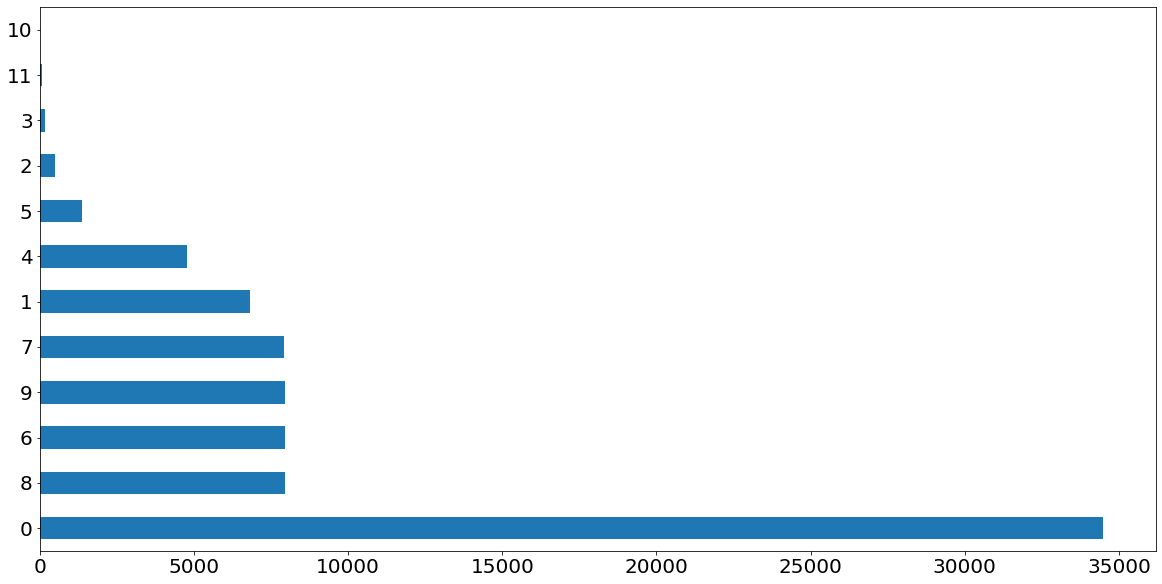

In [131]:

train_attack_types = train_df['Label'].value_counts()
test_attack_types = test_df['Label'].value_counts()
train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

<AxesSubplot:>

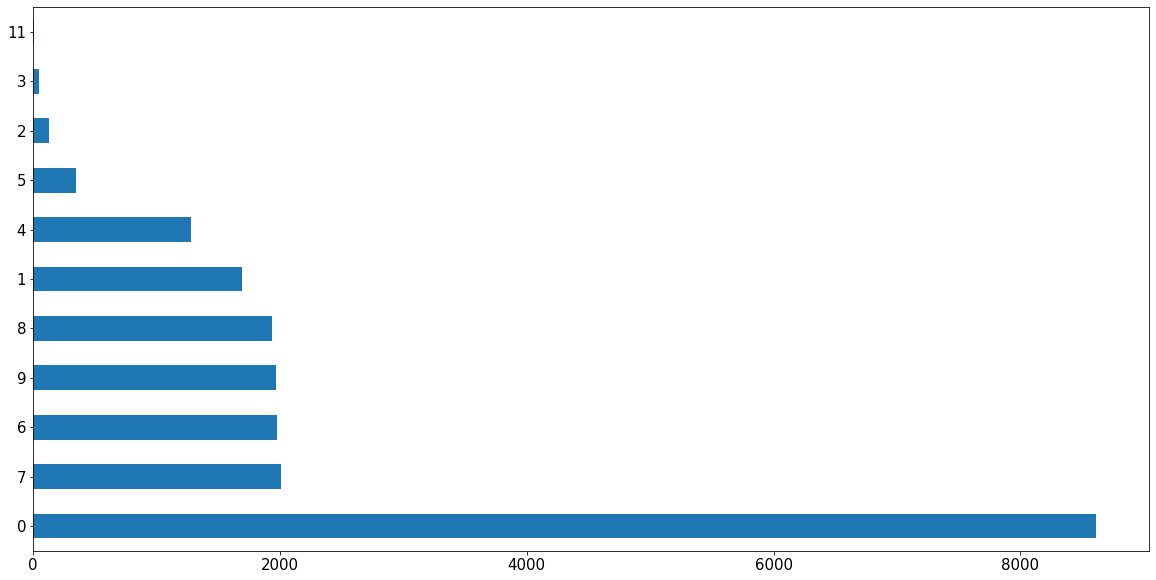

In [132]:
test_attack_types.plot(kind='barh', figsize=(20,10), fontsize=15)

In [133]:
train_Y = train_df['Label']
train_x_raw = train_df.drop(['Label'], axis=1)
test_Y = test_df['Label']
test_x_raw = test_df.drop(['Label'], 
                          axis=1)

In [158]:
_traindata = np.array(train_x_raw)
_trainlabel = np.array(train_Y)
_traindata = train_x_raw.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
_testdata = np.array(test_x_raw)
_testlabel = np.array(test_Y)
_testdata = test_x_raw.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
_testlabel

array([9, 2, 0, ..., 0, 0, 0])

In [159]:
from sklearn import preprocessing

x = _traindata.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [161]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.001221,0.352941,0.041846,0.000015,0.000418,0.000039,0.000070,0.005553,0.000000,0.005577,...,0.000004,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.006761,0.352941,0.842658,0.000046,0.000626,0.000028,0.000015,0.000648,0.000000,0.001302,...,0.000019,0.416667,0.000597,0.000011,0.000604,0.000588,0.168709,0.000504,0.168901,0.168495
2,0.001221,0.352941,0.007997,0.000012,0.000418,0.000002,0.000070,0.000333,0.000000,0.000445,...,0.000004,0.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.051719,1.000000,0.875575,0.000031,0.001044,0.000026,0.000025,0.001247,0.012295,0.001853,...,0.000027,0.166667,0.001336,0.000472,0.001795,0.000942,0.124740,0.001725,0.124740,0.123065
4,0.006791,0.352941,0.013413,0.000027,0.000522,0.000043,0.000042,0.001713,0.000000,0.003473,...,0.000015,0.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
